<h1 style="text-align: center;">Project New York City TLC Trip</h1>
<h3 style="text-align: center;">Ghaisan Rabbani</h3>

---

## **Section 1. Business Context**

**1.1 Context**

NYC TLC (New York City Taxi and Limousine Commission) adalah lembaga pemerintah yang bertanggung jawab untuk mengatur dan memberi lisensi taksi, limusin, dan kendaraan sewaan (FHV) di Kota New York. Tujuan utama mereka adalah memastikan layanan transportasi yang aman, andal, dan mudah diakses bagi penduduk dan pengunjung.  Dengan jutaan perjalanan yang terjadi setiap bulannya, ada kebutuhan penting bagi badan ini untuk meningkatkan efisiensi operasional, mengoptimalkan pendapatan pengemudi, dan meningkatkan kepuasan penumpang.
1. latar belakang NYC TLC?
2. Sistem bisnis TLC bagaimana? (alur)
3. skema


**1.2 Problem Statements**
* bagaimana cara memberikan layanan yang terbaik untuk setiap waktu dan tempat di new york?
* Bagaimana cara meningkatkan keuntungan?
* bagaimana cara meningkatkan kepuasan pelanggan?




**1.3 Key Objective**
* Identifikasi pola waktu dan tempat layanan dengan permintaan tinggi dan mengoptimalkan distribusi pengemudi berdasarkan pola yang telah diidentifikasi.
* Identifikasi strategi yang tepat untuk meningkatkan pendapatan 
* Identifikasi pelanggan yang merasa puas

## **Section 2. Data Understanding**

import packages

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

display the data

In [310]:
df=pd.read_csv(r'C:\Users\ghais\OneDrive\Documents\Purwadhika bootcamp\Modul 2. Data analysis\capstone\Data_analytics_project\data\raw\NYC TLC Trip Record.csv')
display(df.head(),df.tail())

C:\Users\ghais\AppData\Local\Temp\ipykernel_10008\621533642.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'C:\Users\ghais\OneDrive\Documents\Purwadhika bootcamp\Modul 2. Data analysis\capstone\Data_analytics_project\data\raw\NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


In [311]:
df_loc=pd.read_csv(r'C:\Users\ghais\OneDrive\Documents\Purwadhika bootcamp\Modul 2. Data analysis\capstone\Data_analytics_project\data\raw\taxi_zone_lookup.csv')
df_loc=df_loc.fillna("Unknown") #kolom kosong masih tidak diketahui didalam atau diluar new york
df_loc.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


Merge data

In [312]:
df = pd.merge(df, df_loc.add_prefix('PU'), left_on="PULocationID", right_on="PULocationID", how="inner")
df = pd.merge(df, df_loc.add_prefix('DO'), left_on="DOLocationID", right_on="DOLocationID", how="inner")

df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone


### **2.1 General Information**

In [313]:
#overview data

print(f'Overview Data:\n')
print("Rows:", df.shape[0])
print("\nNumber of features:", df.shape[1])
print("\nMissing values:",df.isnull().sum().values.sum())
print("\nDuplicated : ",df.duplicated().any())


Overview Data:

Rows: 68211

Number of features: 26

Missing values: 94165

Duplicated :  False


insight :<br>
data memiliki missing values yang harus diatasi

### **2.2 Feature Information**

In [314]:
df['lpep_dropoff_datetime']=pd.to_datetime(df['lpep_dropoff_datetime'])
df['lpep_pickup_datetime']=pd.to_datetime(df['lpep_pickup_datetime'])

print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             63887 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        63887 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       

Dari penjelasan di atas, dapat diketahui bahwa dataset ini berisi informasi terkait perjalanan TLC ke New York. Terdapat 20 kolom pada dataset df, yaitu:
1. `vendor_id`: ID unik untuk vendor
1. `lpep_pickup_datetime`: Waktu penjemputan penumpang
1. ` lpep_dropoff_datetime`: Waktu penurunan penumpang
1. `store_and_fwd_flag`: data disimpan dalam kendaraan dan diteruskan ke server (Y/n) 
1. `RateCodeID`: Kode tarif yang digunakan selama perjalanan 
1. `PuLocationID`: Zona lokasi penjemputan 
1. `DOLocationID`: Zona lokasi pemberhentian
1. `passenger_count`:  Jumlah penumpang di dalam kendaraan
1. `trip_distance`: Jarak perjalanan dalam mil 
1. `fare_amount`: mencatat tarif perjalanan berdasarkan waktu dan jarak yang ditempuh
1. `extra`: Biaya tambahan. Saat ini, biaya tambahan hanya 0,5 dolar dan 1 dolar untuk jam sibuk dan larut malam.
1. `mta_tax`: Pajak MTA sebesar 0,50 dolar yang diaktifkan secara otomatis berdasarkan tarif argo yang digunakan.
1. `tip_amount`: jumlah tip yang diberikan penumpang kepada pengemudi untuk pembayaran kredit
1. `tolls_amount`: biaya tol yang dibebankan selama perjalanan
1. `ehail_fee`: mencatat biaya tambahan sebesar 1 dolar yang dibebankan untuk perjalanan yang dipesan melalui platform elektronik (e-hail) 
1. `improvement_surcharge`: biaya tambahan yang dikenakan untuk meningkatkan kualitas layanan sebesar 0,30 dolar yang dinilai pada awal perjalanan.
1. `total_amount`: Jumlah total yang dibebankan kepada penumpang, tidak termasuk tip tunai. (jumlah_tarif, ekstra, mta_pajak, jumlah_tip, dan jumlah_tol, biaya ehail, dan biaya_perbaikan)
1. `payment_type`: jenis pembayaran yang digunakan oleh penumpang
1. `trip_type`: Kode untuk perjalanan
1. `congestion_surchange`: biaya tambahan sebesar 2,75 dolar yang dikenakan karena kemacetan lalu lintas.
1. `PUBorough` : wilayah penjumputan
1. `PUZone` : zona dalam wilayah penjumputan
1. `PUservice_zone` : jenis layanan yang ada di wilayah tersebut
1. `DOBorough` : wilayah pemberhentian
1. `DOZone` : zona dalam wilayah pemberhentian
1. `DOservice_zone` : jenis layanan yang ada di wilayah tersebut


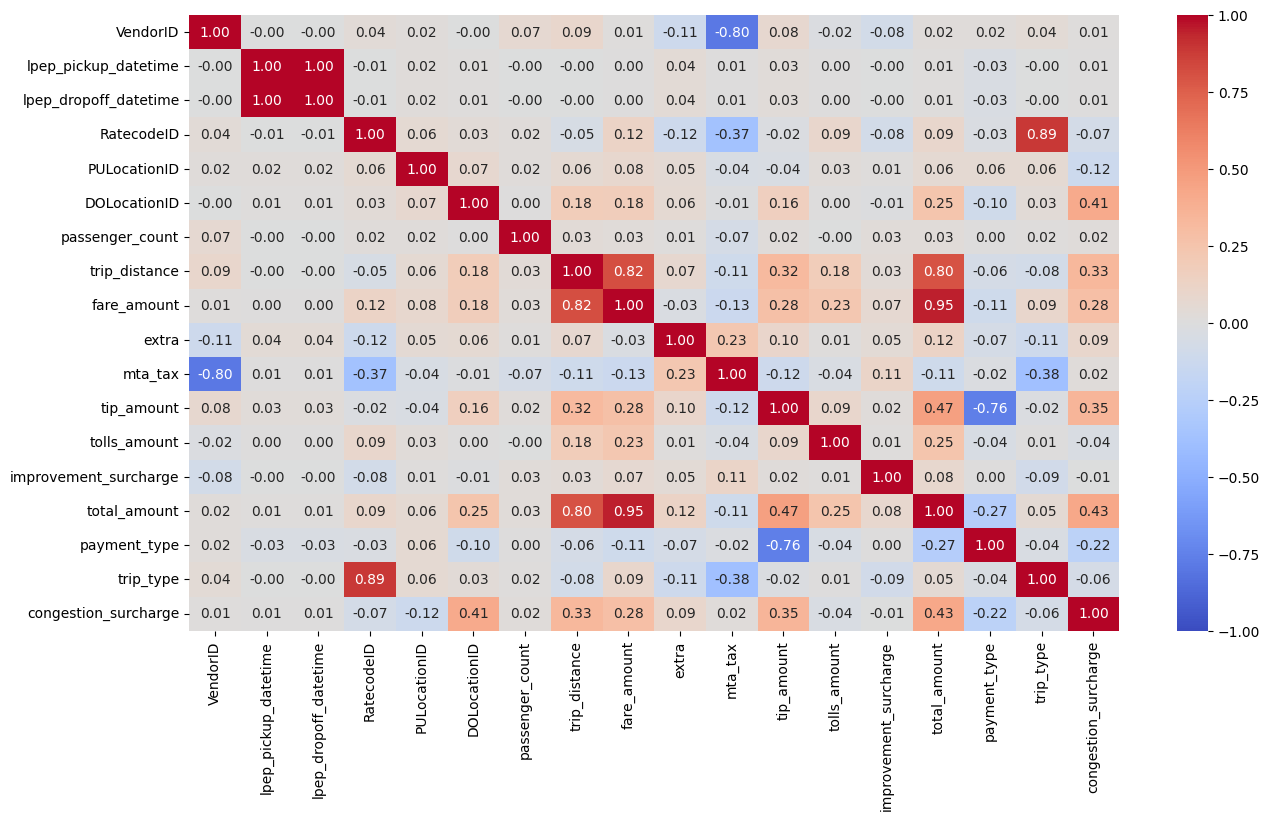

In [315]:
df_int=df.drop(labels=['ehail_fee','store_and_fwd_flag','PUBorough','DOBorough', 'PUZone','DOZone','PUservice_zone','DOservice_zone'],axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(df_int.corr('spearman'), vmin=-1, vmax=1, annot=True, fmt=".2f",cmap="coolwarm")
plt.show()

korelasi positif : 
- `total_amount` memiliki korelasi kuat `fare_amount` sebesar 0.95 dan `trip_distance` sebesar 0.8.
- `RatecodeID` memiliki korelasi kuat `trip_type` sebesar 0.89.
- `fare_amount` memiliki korelasi kuat `trip_distance` sebesar 0.82.

korelasi negatif : 
- `VendorID` memiliki korelasi kuat `mta_tax` sebesar -0.80 
- `payment_type` memiliki korelasi kuat `tip_amount` sebesar -0.76.


### **2.3 Statistics Summary**

In [316]:
display(df.describe(), df.describe(include='object'))

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,68211,68211,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,2023-01-16 20:10:55.679524096,2023-01-16 20:29:01.515767040,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,2023-01-09 11:59:47.500000,2023-01-09 12:16:37.500000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 08:40:42,2023-01-17 08:56:38,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 15:52:30,2023-01-24 16:06:56,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000
std,0.343820,NaN,NaN,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836


,store_and_fwd_flag,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
count,63887,68211,68211,68211,68211,68211,68211
unique,2,7,225,5,7,248,5
top,N,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem South,Boro Zone
freq,63579,39436,13257,64013,39617,3524,43605


1. Untuk tipe numerik jika dilihat bahwa nilai median != mean maka dapat disimpulkan untuk kolom UPLocationID, trip_distance, fare_amount, tip_amount, dan total_amount tidak berdistribusi normal

2. kolom RatecodeID, trip_distance, fare_amount, tip_amount, total_amount memiliki max yang nilainya jauh dari nilai yang lainnya ini bisa menunjukkan bahwa nilai tersebut adalah outlier

3. terdapat nilai negatif untuk fare_amount, tip_amount, total_amount yang seharusnya nilai tersebut bukan negatif

In [317]:
# plt.figure(figsize=(20,25))
# for index, column in enumerate(df.describe().columns):
#     plt.subplot(3,6,index+1)
#     sns.boxplot(df[column])
# plt.show()

## **Section 3. Data Cleaning**

### **3.1 Delete Column**

Menghapus kolom yang tidak diperlukan

In [318]:
df=df.drop(['VendorID', 'store_and_fwd_flag', 'ehail_fee', 'extra', 'mta_tax', 'tolls_amount','improvement_surcharge', 'congestion_surcharge', 'PUservice_zone', 'DOservice_zone'], axis=1)
df

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,166,143,1.0,2.58,14.90,4.03,24.18,1.0,1.0,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,24,43,1.0,1.81,10.70,2.64,15.84,1.0,1.0,Manhattan,Bloomingdale,Manhattan,Central Park
2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,223,179,1.0,0.00,7.20,1.94,11.64,1.0,1.0,Queens,Steinway,Queens,Old Astoria
3,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,41,238,1.0,1.30,6.50,1.70,10.20,1.0,1.0,Manhattan,Central Harlem,Manhattan,Upper West Side North
4,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,41,74,1.0,1.10,6.00,0.00,8.00,1.0,1.0,Manhattan,Central Harlem,Manhattan,East Harlem North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,49,62,NaN,4070.82,15.70,0.00,16.70,NaN,NaN,Brooklyn,Clinton Hill,Brooklyn,Crown Heights South
68207,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,10,205,NaN,2.14,4.41,0.00,5.41,NaN,NaN,Queens,Baisley Park,Queens,Saint Albans
68208,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,66,37,NaN,3.44,16.53,3.51,21.04,NaN,NaN,Brooklyn,DUMBO/Vinegar Hill,Brooklyn,Bushwick South
68209,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,225,189,NaN,3.03,14.98,3.20,19.18,NaN,NaN,Brooklyn,Stuyvesant Heights,Brooklyn,Prospect Heights


### **3.1 Missing Values and anomali values**

In [319]:
import missingno as msno

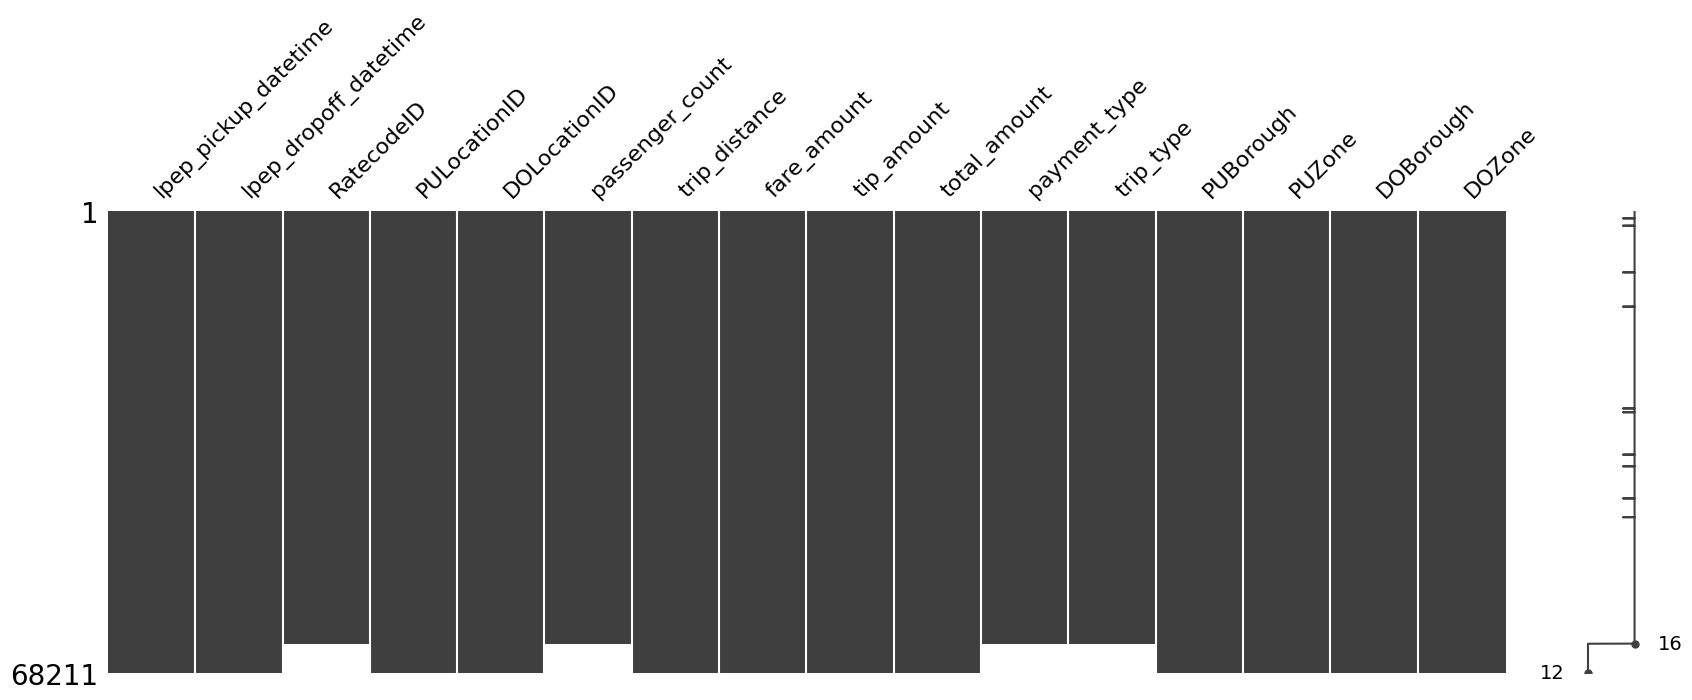

In [320]:
msno.matrix(df, figsize=(20, 6))
plt.show()

In [321]:
df.isna().sum()

lpep_pickup_datetime        0
lpep_dropoff_datetime       0
RatecodeID               4324
PULocationID                0
DOLocationID                0
passenger_count          4324
trip_distance               0
fare_amount                 0
tip_amount                  0
total_amount                0
payment_type             4324
trip_type                4334
PUBorough                   0
PUZone                      0
DOBorough                   0
DOZone                      0
dtype: int64

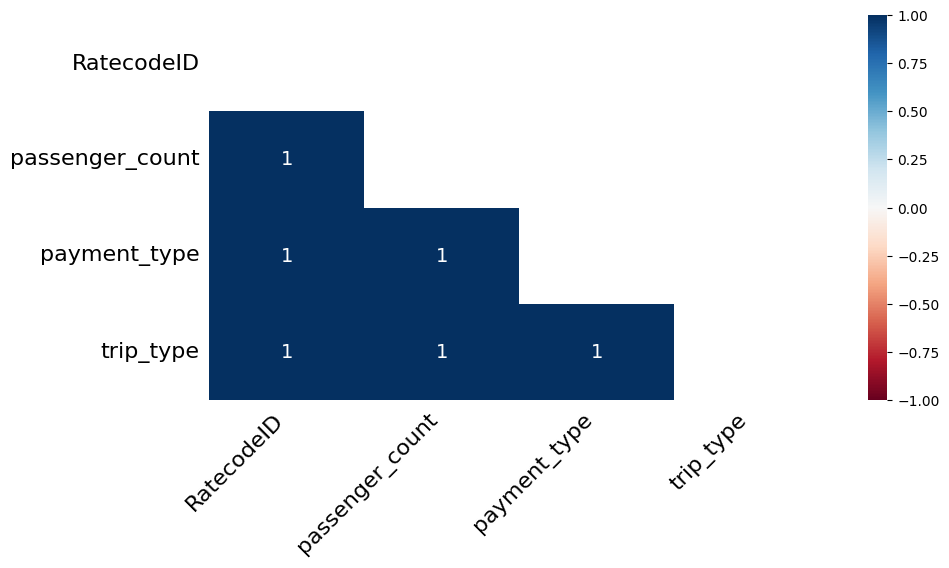

In [322]:
msno.heatmap(df, figsize=(10, 5))
plt.show()

**insight** <br>
tampilan heatmap menunjukkan bahwa setiap kolom yang memiliki missing values menghasilkan 1, ini berarti menunjukkan bahwa semua kolom yang memiliki missing values ada di baris yang sama

---

#### RatecodeID

akan dilakukan mengisi nilai missing values untuk kolom `RatecodeID`:

Menurut website NYC TLC (https://www.nyc.gov/site/tlc/passengers/taxi-fare.page) bahwa nilai RatecodeID yaitu :
1. `"Rate #01 – Standard City Rate"` -> tarif taksi dalam batas Kota.
1. `"Rate #2- JFK Airport"` -> tarif Perjalanan antara Manhattan dan Bandara John F. Kennedy (JFK) di kedua arah.
1. `"Rate #3 - Newark Airport"` -> tarif Perjalanan ke Bandara Newark (EWR).
1. `"Rate #04 – Out of City Rate to Nassau or Westchester"` tarif Setelah taksi melampaui batas Kota ke Nassau atau Westchester, pesan tarif di layar akan berbunyi.
1. `"Rate #05 – Out of City Negotiated Flat Rate"` tarif titik Lain di Luar Kota.

Dapat disimpulkan bahwa RatecodeID merupakan missing values bertipe MAR (Missing At Random) yang dapat diisi dengan nilai yang sesuai berdasarkan informasi dari `PUBorough` dan `DOBorough`

In [323]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     62103
5.0      1529
2.0       158
4.0        57
3.0        30
99.0       10
Name: count, dtype: int64

terdapat nilai 99 pada kolom `RatecodeID` yang seharusnya nilainya adalah 1-5, maka nilai 99 akan diubah ke kolom missing

In [324]:
df['RatecodeID'] = df['RatecodeID'].replace(99, np.nan) # replace 99 with NaN
df['RatecodeID'].value_counts()

RatecodeID
1.0    62103
5.0     1529
2.0      158
4.0       57
3.0       30
Name: count, dtype: int64

Cek missing values pada kolom `RatecodeID`

In [325]:
df.loc[(df['RatecodeID'].isna()) ,['RatecodeID','PUBorough','DOBorough']]

,RatecodeID,PUBorough,DOBorough
1084,NaN,Brooklyn,Brooklyn
2174,NaN,Queens,Queens
9055,NaN,Brooklyn,Brooklyn
14125,NaN,Brooklyn,Brooklyn
29143,NaN,Brooklyn,Brooklyn
...,...,...,...
68206,NaN,Brooklyn,Brooklyn
68207,NaN,Queens,Queens
68208,NaN,Brooklyn,Brooklyn
68209,NaN,Brooklyn,Brooklyn


Nilai `RatecodeID`= 2  memiliki tujuan/nilai :

* manhattan -> Zone(bandara JFK)<br>
* Zone(bandara JFK) -> manhattan


Cek Missing values untuk `RatecodeID`= 2

 Menegisi `RatecodeID` = 2 Yang sesuai

In [326]:
#cek
df.loc[(df['RatecodeID'].isna()) & (df['PUBorough']== 'Manhattan') & (df['DOZone']=='JFK Airport'),['RatecodeID','PUBorough','DOZone']].head()

,RatecodeID,PUBorough,DOZone
64078,NaN,Manhattan,JFK Airport
64121,NaN,Manhattan,JFK Airport
64122,NaN,Manhattan,JFK Airport
64169,NaN,Manhattan,JFK Airport
64318,NaN,Manhattan,JFK Airport


In [327]:
#atasi
df.loc[(df['PUBorough']=='Manhattan') & (df['DOZone']=='JFK Airport') & (df['RatecodeID'].isna()), 'RatecodeID'] = 2

In [328]:
#cek
df.loc[(df['RatecodeID'].isna()) & (df['DOBorough']== 'Manhattan') & (df['PUZone']=='JFK Airport'),['RatecodeID','DOBorough','PUZone']]
#atasi
# df.loc[(df['PUZone']=='JFK Airport') & (df['DOBorough']=='Manhattan') & (df['RatecodeID'].isna()), 'RatecodeID'] = 2

,RatecodeID,DOBorough,PUZone


Cek Nilai Valid `RatecodeID` = 2

In [329]:
#cek
df.loc[(df['PUBorough']=='Manhattan') & (df['DOZone']=='JFK Airport') & (df['RatecodeID']==2), ['RatecodeID','PUBorough','DOBorough','DOZone']].value_counts()

RatecodeID  PUBorough  DOBorough  DOZone     
2.0         Manhattan  Queens     JFK Airport    144
Name: count, dtype: int64

In [330]:
#cek
df.loc[(df['PUZone']=='JFK Airport') & (df['DOBorough']=='Manhattan') & (df['RatecodeID']==2), ['RatecodeID','PUBorough','DOBorough','PUZone']].value_counts()

RatecodeID  PUBorough  DOBorough  PUZone     
2.0         Queens     Manhattan  JFK Airport    1
Name: count, dtype: int64

nilai yang tidak sesuai untuk `RatecodeID` = 2

In [331]:
df.loc[(df['RatecodeID']==2),['RatecodeID','PUBorough','DOBorough']].value_counts()

RatecodeID  PUBorough  DOBorough
2.0         Manhattan  Queens       148
                       Manhattan     20
            Queens     Queens        18
            Brooklyn   Brooklyn      11
            Queens     Manhattan      2
            Bronx      Queens         1
            Manhattan  Unknown        1
            Queens     Unknown        1
            Unknown    Unknown        1
Name: count, dtype: int64

Kolom Unknown pada `RatecodeID`= 2

In [332]:
df.loc[(df['RatecodeID']==2) & (df['PUBorough']== 'Manhattan') & (df['DOBorough']=='Unknown'),['RatecodeID','PUBorough','PUZone','DOBorough','DOZone']]

,RatecodeID,PUBorough,PUZone,DOBorough,DOZone
8495,2.0,Manhattan,East Harlem South,Unknown,Unknown


Akan diisi `DOBorouugh` dan `DOZone` yaitu Queens dan JFK Airport karena `RatecodeID`= 2 

In [333]:
df.loc[(df['RatecodeID']==2) & (df['PUBorough']== 'Manhattan') & (df['DOBorough']=='Unknown'),['DOBorough','DOZone']]=['Queens','JFK Airport']
df.loc[(df['RatecodeID']==2) & (df['PUBorough']== 'Manhattan') & (df['DOBorough']=='Unknown'),['RatecodeID','PUBorough','PUZone','DOBorough','DOZone']]

,RatecodeID,PUBorough,PUZone,DOBorough,DOZone


Dicek untuk sebaliknya nilai Unknown

In [334]:
df.loc[(df['RatecodeID']==2) & (df['PUBorough']== 'Queens') & (df['DOBorough']=='Unknown'),['RatecodeID','PUBorough','PUZone','DOBorough','DOZone']]

,RatecodeID,PUBorough,PUZone,DOBorough,DOZone
44538,2.0,Queens,East Elmhurst,Unknown,Unknown


karena `PUZone` != JFK Airport maka tidak valid

Kolom yang tidak sesuai dengan nilai `RatecodeID`= 2 maka akan diganti valuenya `RatecodeID`= 1

In [335]:
df.loc[(df['RatecodeID']==2),['RatecodeID','PUBorough','DOBorough']].value_counts()

RatecodeID  PUBorough  DOBorough
2.0         Manhattan  Queens       149
                       Manhattan     20
            Queens     Queens        18
            Brooklyn   Brooklyn      11
            Queens     Manhattan      2
            Bronx      Queens         1
            Queens     Unknown        1
            Unknown    Unknown        1
Name: count, dtype: int64

In [336]:
#pergantian kolom
df.loc[(df['RatecodeID']==2) & (df['PUBorough']== 'Queens') & (df['DOBorough']=='Queens'),'RatecodeID']=1
df.loc[(df['RatecodeID']==2) & (df['PUBorough']== 'Manhattan') & (df['DOBorough']=='Manhattan'),'RatecodeID']=1
df.loc[(df['RatecodeID']==2) & (df['PUBorough']== 'Brooklyn') & (df['DOBorough']=='Brooklyn'),'RatecodeID']=1
df.loc[(df['RatecodeID']==2) & (df['PUBorough']== 'Bronx') & (df['DOBorough']=='Queens'),'RatecodeID']=1

df.loc[(df['RatecodeID']==2),['RatecodeID','PUBorough','DOBorough']].value_counts()


RatecodeID  PUBorough  DOBorough
2.0         Manhattan  Queens       149
            Queens     Manhattan      2
                       Unknown        1
            Unknown    Unknown        1
Name: count, dtype: int64

`RatecodeID` = 3 memiliki nilai :
* nilai kolom `DOBorough` = EWR

missing values untuk `RatecodeID`= 3

In [337]:
df.loc[(df['DOZone']=='Newark Airport') & (df['RatecodeID'].isna()), ['RatecodeID','PUBorough','PUZone','DOBorough','DOZone']]

,RatecodeID,PUBorough,PUZone,DOBorough,DOZone
64123,NaN,Manhattan,Lenox Hill West,EWR,Newark Airport
64765,NaN,Brooklyn,Stuyvesant Heights,EWR,Newark Airport
64952,NaN,Queens,Forest Hills,EWR,Newark Airport
65188,NaN,Manhattan,Times Sq/Theatre District,EWR,Newark Airport


In [338]:
#ubah nilai 
df.loc[(df['RatecodeID'].isna()) & (df['DOBorough']=='EWR'),'RatecodeID'] = 3

#cek
df.loc[(df['RatecodeID'].isna()) & (df['DOBorough']=='EWR'),['RatecodeID','PUBorough','PUZone','DOBorough','DOZone']]

,RatecodeID,PUBorough,PUZone,DOBorough,DOZone


Nilai yang tidak sesuai untuk `RatecodeID`= 3

In [339]:
df.loc[(df['RatecodeID']==3),['RatecodeID','PUBorough','DOBorough']].value_counts()

RatecodeID  PUBorough      DOBorough    
3.0         Manhattan      EWR              8
                           Unknown          5
            Queens         Queens           5
            Brooklyn       Brooklyn         4
            Manhattan      Manhattan        4
            Brooklyn       EWR              2
                           Manhattan        1
            Bronx          Bronx            1
            Manhattan      Queens           1
            Brooklyn       Unknown          1
            Queens         EWR              1
            Staten Island  Staten Island    1
Name: count, dtype: int64

In [340]:
#kolom yang Unknown
df.loc[(df['RatecodeID']==3) & (df['DOBorough']=='Unknown'),'DOBorough']='EWR' #Manhattan -> Unknown=EWR

#kolom yang tidak sesuai
df.loc[(df['RatecodeID']==3) & (df['DOBorough']!='EWR'),'RatecodeID']=1 


In [341]:
df.loc[(df['RatecodeID']==3),['RatecodeID','PUBorough','DOBorough']].value_counts()

RatecodeID  PUBorough  DOBorough
3.0         Manhattan  EWR          13
            Brooklyn   EWR           3
            Queens     EWR           1
Name: count, dtype: int64

Jika dilihat dii website bahwa nilai `RatecodeID`= 4 ada keterkaitan dengan nassau dan Westcester

In [342]:
df[df['RatecodeID']==4][['PUBorough', 'DOBorough']].value_counts()

PUBorough  DOBorough
Queens     Unknown      38
Manhattan  Unknown       7
Unknown    Unknown       4
Bronx      Unknown       2
Brooklyn   Unknown       2
Manhattan  Manhattan     2
           EWR           1
Unknown    Queens        1
Name: count, dtype: int64

dengan ini maka kemungkinan besar untuk kolom `Unknown` dapat diisi dengan nassau/westcester<br>
tetapi karena hanya fokus di newyork maka akan dihapus untuk nilai `RatecodeID`= 4

tetapi sebelum itu akan disesuaikan terlebih dahulu

In [343]:
df.loc[(df['RatecodeID']==4) & (df['DOBorough']=='EWR'),['RatecodeID','PUBorough','DOBorough','DOZone']]

,RatecodeID,PUBorough,DOBorough,DOZone
46141,4.0,Manhattan,EWR,Newark Airport


In [344]:
df.loc[(df['RatecodeID']==4) & (df['DOBorough']=='EWR'),'RatecodeID']=3
df.loc[(df['RatecodeID']==4) & (df['DOBorough']=='EWR'),['RatecodeID','PUBorough','DOBorough','DOZone']]

,RatecodeID,PUBorough,DOBorough,DOZone


merubah kolom yang gakada unknown menjadi 1

In [345]:
df.loc[(df['RatecodeID']==4) & (df['PUBorough']!='Unknown') & (df['DOBorough']!='Unknown'), 'RatecodeID'] = 1

In [346]:
df[df['RatecodeID']==4][['PUBorough', 'DOBorough']].value_counts()

PUBorough  DOBorough
Queens     Unknown      38
Manhattan  Unknown       7
Unknown    Unknown       4
Bronx      Unknown       2
Brooklyn   Unknown       2
Unknown    Queens        1
Name: count, dtype: int64

In [347]:
df[df['RatecodeID']==5][['PUBorough', 'DOBorough']].value_counts()

PUBorough      DOBorough    
Queens         Queens           621
Manhattan      Manhattan        183
Brooklyn       Brooklyn         156
Bronx          Bronx             96
Queens         Unknown           91
Unknown        Unknown           68
Brooklyn       Manhattan         49
               Queens            49
Queens         Manhattan         45
Brooklyn       Unknown           42
Manhattan      Unknown           39
               Bronx             29
Bronx          Unknown           14
Manhattan      Queens            12
Queens         Brooklyn          10
Manhattan      Brooklyn           5
Bronx          Queens             4
Brooklyn       EWR                4
Bronx          Manhattan          4
Queens         EWR                2
               Bronx              2
EWR            Unknown            1
Staten Island  Staten Island      1
Unknown        Bronx              1
               EWR                1
Name: count, dtype: int64

Akan dilakukan DROP untuk kolom yang ada Unknown karena diluar wilayah NewYork Nilai = (Unknown)

In [348]:
df.drop(df[df['PUBorough']=='Unknown'].index, inplace=True)
df.drop(df[df['DOBorough']=='Unknown'].index, inplace=True)

Akan diasumsikan bahwa nilai pada `RatecodeID` = Nan adalah nilainya 1 

In [349]:
df['RatecodeID'].fillna(1, inplace=True)

C:\Users\ghais\AppData\Local\Temp\ipykernel_10008\427974952.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(1, inplace=True)


In [350]:
#cek
print(df['RatecodeID'].value_counts())
print('Total NaN values: ', df['RatecodeID'].isna().sum())

RatecodeID
1.0    66065
5.0     1272
2.0      151
3.0       18
Name: count, dtype: int64
Total NaN values:  0


sudah tidak ada missing values untuk kolom `RatecodeID`

---

#### Passanger_count

akan dilakukan mengisi nilai missing values untuk kolom `Passanger_count`:

In [351]:
#cek values
print(df['passenger_count'].value_counts())
print("Missing Values : ", df['passenger_count'].isna().sum())


passenger_count
1.0    53709
2.0     5049
5.0     1763
6.0     1050
3.0      943
4.0      360
0.0      322
7.0        3
8.0        2
9.0        1
Name: count, dtype: int64
Missing Values :  4304


Terdapat missing values = 4304 dan terdapat nilai 0 yang tidak mungkin terjadi sehingga dianggap missing values

Dilihat pesebaran, jika<br>
data terdistribusi normal maka missing values diisi oleh rata rata <Br>
data tidak terdistribusi normal maka missing values diisi oleh rata rata

<Axes: xlabel='passenger_count', ylabel='Count'>

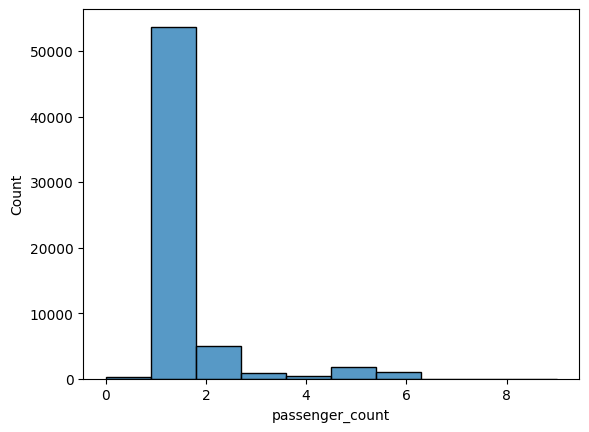

In [352]:
sns.histplot(df['passenger_count'],bins=10)

Jika dilihat bahwa nilai tidak terdistribusi normal, maka missing values = 4304 dan nilai = 0 diisi dengan median

In [353]:
# Ubah nilai 0 ke missing values
df['passenger_count'] = df['passenger_count'].replace(0, np.nan)

In [354]:
#median
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)

C:\Users\ghais\AppData\Local\Temp\ipykernel_10008\423616798.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)


In [355]:
#cek
print(df['passenger_count'].value_counts())
print('Total missing values: ', df['passenger_count'].isna().sum())

passenger_count
1.0    58335
2.0     5049
5.0     1763
6.0     1050
3.0      943
4.0      360
7.0        3
8.0        2
9.0        1
Name: count, dtype: int64
Total missing values:  0


---

#### Payment_type

akan dilakukan mengisi nilai missing values untuk kolom `payment_type`:

In [356]:
df['payment_type'].isna().sum()

np.int64(4304)

untuk kolom `payment_type` berkaitan dengan kolom `tip_amount` karena tip>0 menggunakan pembayaran credit card, jika pake cash maka tip tidak masuk ke data. Maka dapat disimpulkan bahwa
- Jika `tip_amount` > 0 maka `payment_type` = 1 Credit Card
- Jika `tip_amount` = 0 maka `payment_type` = 5 Unknown 

**NILAI ANOMALI `payment_type`**

In [357]:
df[(df['tip_amount']>0)]['payment_type'].value_counts()

payment_type
1.0    35303
3.0        8
4.0        1
2.0        1
Name: count, dtype: int64

terdapat nilai yang tidak semestinya masuk ke dalam `payment_type` = 2, 3, 4 <br>
`payment_type`= 2 sudah pasti tidak mungkin karena uang cash tidak bisa memberikan tip atau tip tidak masuk <br>
akan dilakukan pengecekan `payment_type` = 3 apakah no charge (free pembayaran)? 

In [358]:
df.loc[(df['tip_amount']>0) & (df['payment_type']==3),['total_amount', 'tip_amount','payment_type']]

,total_amount,tip_amount,payment_type
3410,5.40,0.90,3.0
7794,5.40,0.90,3.0
8108,4.51,0.01,3.0
10337,5.33,0.13,3.0
18004,5.21,0.01,3.0
30875,5.40,0.90,3.0
37072,5.40,0.90,3.0
56496,5.40,0.90,3.0


karena `total_amount` != 0 maka **tidak valid**

akan dilakukan pengecekan `payment_type` = 4 apakah dispute(masalah pembayaran)? 

In [359]:
df.loc[(df['tip_amount']>0) & (df['payment_type']==4),['total_amount', 'tip_amount','payment_type']]

,total_amount,tip_amount,payment_type
14708,15.0,10.5,4.0


tidak ada permasalahan karena tidak ditemukannya **anomali**

karena sudah di cek tiap nilainya dan dipatkan bahwa tidak ada anomali atau aneh, maka nilai <br>
`payment_type`= 2, 3, 4 akan diganti menjadi `payment_type`= 1

In [360]:
df.loc[(df['tip_amount']>0) & ((df['payment_type']==2) |(df['payment_type']==3) | (df['payment_type']==4)), 'payment_type'] = 1

#cek
df[(df['tip_amount']>0)]['payment_type'].value_counts()

payment_type
1.0    35313
Name: count, dtype: int64

**MISSING VALUES `payment_type`**

* Untuk `tip_amount` > 0 maka nilainya `payment_type`= 1 
* Untuk `tip_amount` = 0 maka nilainya `payment_type`= 5 karena tidak diketahui nilainya

In [361]:
df.loc[df['payment_type'].isna(), ['tip_amount', 'payment_type']]

,tip_amount,payment_type
63887,7.41,NaN
63888,3.11,NaN
63889,6.63,NaN
63890,0.00,NaN
63891,4.68,NaN
...,...,...
68206,0.00,NaN
68207,0.00,NaN
68208,3.51,NaN
68209,3.20,NaN


In [362]:
df.loc[df['payment_type'].isna(), 'payment_type'] = df['tip_amount'].apply(lambda x: 1 if x > 0.0 else 5)

In [363]:
#cek 
print(df['payment_type'].value_counts())
print("Nilai missing values:", df['payment_type'].isna().sum())


payment_type
1.0    44094
2.0    22377
5.0      492
3.0      452
4.0       91
Name: count, dtype: int64
Nilai missing values: 0


pada kolom `payment_type` sudah tidak ada missing values

---

#### Trip_type

akan dilakukan mengisi nilai missing values untuk kolom `trip_type`:

bedasarkan grafik heatmap diatas, fitur `trip_type` sangat dipengaruhi oleh `RatecodeID` dengan nilai korelasi sebesar 0,89

In [364]:
#melihat nilai trip_type pada RatecodeID
df.groupby(['RatecodeID', 'trip_type']).agg(total=('trip_type', 'count'))

total
RatecodeID trip_type       
1.0        1.0        61795
           2.0            6
2.0        1.0          106
3.0        1.0           14
5.0        1.0          131
           2.0         1141

In [365]:
#melihat nilai missing values trip_type pada RatecodeID
df[df['trip_type'].isna()].groupby('RatecodeID').agg(total=('RatecodeID', 'count'))

,total
RatecodeID,
1.0,4264
2.0,45
3.0,4


bedasarkan informasi diatas, mostly nilai untuk `RatecodeID`= 1, 2, 3 adalah `trip_type`=1 <br>
maka dapat diputuskan missing value dapat diisi dengan 1

In [366]:
df['trip_type'].fillna(1, inplace=True)

C:\Users\ghais\AppData\Local\Temp\ipykernel_10008\3010706905.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trip_type'].fillna(1, inplace=True)


In [367]:
print(df['trip_type'].value_counts())
print('total missing values: ',df['trip_type'].isna().sum())

trip_type
1.0    66359
2.0     1147
Name: count, dtype: int64
total missing values:  0


pada kolom `trip_type` sudah tidak ada missing values

---

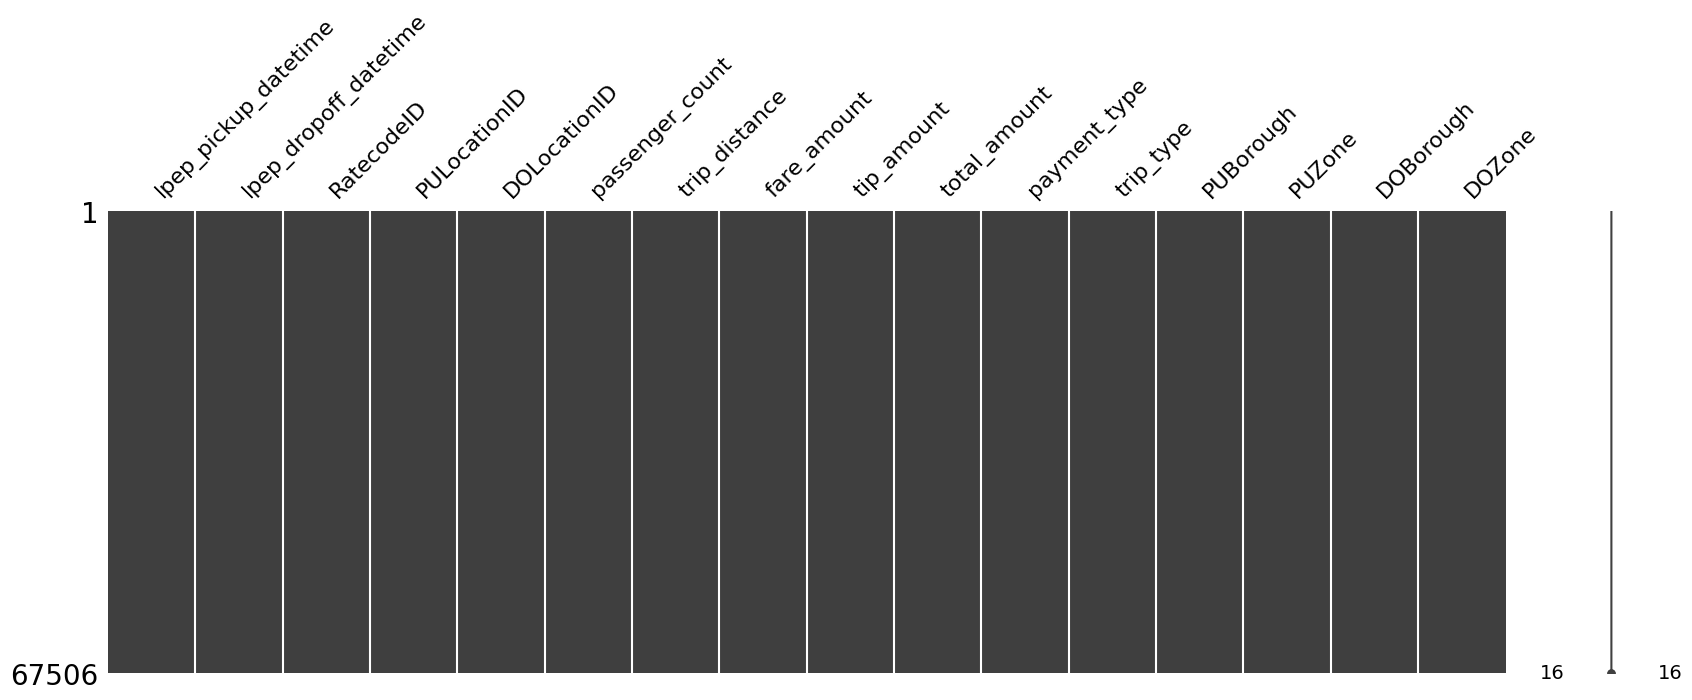

In [368]:
msno.matrix(df, figsize=(20, 6))
plt.show()

sudah tidak ada missing values

### **3.2 Identify Outlier and Anomaly Values**

In [369]:
display(df.describe(), df.describe(include='object'))

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type
count,67506,67506,67506.000000,67506.000000,67506.000000,67506.000000,67506.000000,67506.000000,67506.000000,67506.000000,67506.00000,67506.000000
mean,2023-01-16 20:17:04.972861696,2023-01-16 20:35:07.410556160,1.078141,97.949634,137.234468,1.301558,8.148810,16.413153,2.133978,21.602455,1.37807,1.016991
min,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,3.000000,1.000000,1.000000,0.000000,-70.000000,-10.500000,-71.500000,1.00000,1.000000
25%,2023-01-09 12:17:09.500000,2023-01-09 12:34:29.500000,1.000000,74.000000,74.000000,1.000000,1.130000,9.300000,0.000000,12.900000,1.00000,1.000000
50%,2023-01-17 08:44:35.500000,2023-01-17 08:59:47,1.000000,75.000000,138.000000,1.000000,1.850000,13.320000,1.600000,17.870000,1.00000,1.000000
75%,2023-01-24 15:54:16,2023-01-24 16:10:54.750000128,1.000000,129.000000,216.000000,1.000000,3.200000,19.800000,3.330000,26.040000,2.00000,1.000000
max,2023-02-01 03:10:05,2023-02-01 17:27:05,5.000000,263.000000,265.000000,9.000000,120098.840000,490.000000,222.220000,491.000000,5.00000,2.000000
std,NaN,NaN,0.546522,60.579526,76.100577,0.947868,588.152576,12.773036,2.983440,14.786192,0.58658,0.129239


,PUBorough,PUZone,DOBorough,DOZone
count,67506,67506,67506,67506
unique,5,221,6,247
top,Manhattan,East Harlem North,Manhattan,East Harlem South
freq,39314,13224,39616,3524


In [370]:
for col in df.select_dtypes('object').columns:
    print(col)
    print(df[df[col]=='Unknown'])

PUBorough
Empty DataFrame
Columns: [lpep_pickup_datetime, lpep_dropoff_datetime, RatecodeID, PULocationID, DOLocationID, passenger_count, trip_distance, fare_amount, tip_amount, total_amount, payment_type, trip_type, PUBorough, PUZone, DOBorough, DOZone]
Index: []
PUZone
Empty DataFrame
Columns: [lpep_pickup_datetime, lpep_dropoff_datetime, RatecodeID, PULocationID, DOLocationID, passenger_count, trip_distance, fare_amount, tip_amount, total_amount, payment_type, trip_type, PUBorough, PUZone, DOBorough, DOZone]
Index: []
DOBorough
Empty DataFrame
Columns: [lpep_pickup_datetime, lpep_dropoff_datetime, RatecodeID, PULocationID, DOLocationID, passenger_count, trip_distance, fare_amount, tip_amount, total_amount, payment_type, trip_type, PUBorough, PUZone, DOBorough, DOZone]
Index: []
DOZone
Empty DataFrame
Columns: [lpep_pickup_datetime, lpep_dropoff_datetime, RatecodeID, PULocationID, DOLocationID, passenger_count, trip_distance, fare_amount, tip_amount, total_amount, payment_type, trip_

insight Outlier/anomaly di variabel kuantitatif:
- date terdapat nilai min yaitu pada tahun 2009 padahal data termasuk dalam 2023
- passanger_count terdapat nilai max=9 yang dimana seharusnya tidak mungkin terjadi
- Trip_distance yang jaraknya untuk max tidak masuk akal/outlier
- amount menghasilkan nilai min yaitu mines yang dimana seharusnya tidak mines


#### Datetime : `lpep_pickup_datetime` dan `lpep_dropoff_datetime`

Jika dilihat dari website : https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page <br>
Bahwa NYC TLC melakukan record data setiap bulannya, maka dapat disimpulkan bahwa data ini untuk tahun 2023 pada bulan januari. selain bulan Januari 2023 adalah outlier

<function matplotlib.pyplot.show(close=None, block=None)>

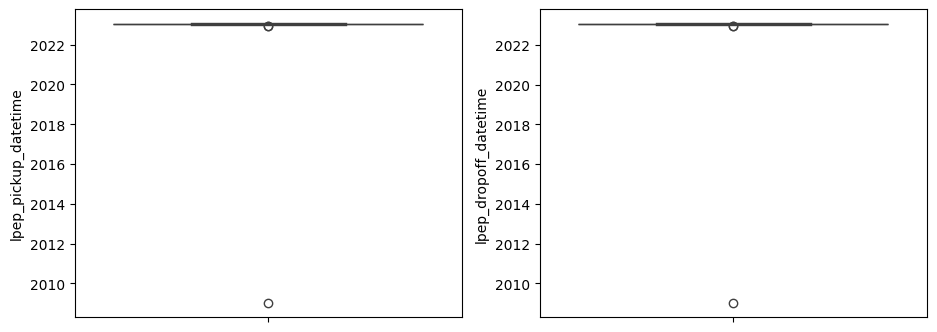

In [371]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
sns.boxplot(df['lpep_pickup_datetime'])
plt.subplot(1,2,2)
sns.boxplot(df['lpep_dropoff_datetime'])
plt.show

In [372]:
df[(df['lpep_pickup_datetime'].dt.month!=1) | (df['lpep_pickup_datetime'].dt.year!=2023)]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
298,2022-12-09 14:10:49,2022-12-09 14:22:26,1.0,7,56,1.0,5.37,16.0,0.00,16.80,2.0,1.0,Queens,Astoria,Queens,Corona
318,2022-12-09 14:55:42,2022-12-09 15:33:06,1.0,260,164,1.0,5.48,25.5,0.00,35.60,2.0,1.0,Queens,Woodside,Manhattan,Midtown South
17874,2009-01-01 20:21:27,2009-01-02 11:07:31,1.0,65,178,1.0,7.72,34.5,7.20,43.20,1.0,1.0,Brooklyn,Downtown Brooklyn/MetroTech,Brooklyn,Ocean Parkway South
25100,2023-02-01 03:10:05,2023-02-01 03:40:35,5.0,82,198,2.0,4.58,28.0,5.66,33.96,1.0,2.0,Queens,Elmhurst,Queens,Ridgewood


In [373]:
df.drop(df[(df['lpep_pickup_datetime'].dt.month!=1) | (df['lpep_pickup_datetime'].dt.year!=2023)].index,inplace=True)
df[(df['lpep_pickup_datetime'].dt.month!=1) | (df['lpep_pickup_datetime'].dt.year!=2023)]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone


---

#### Jumlah Penumpang : `Pasangger_Count`

<Axes: ylabel='passenger_count'>

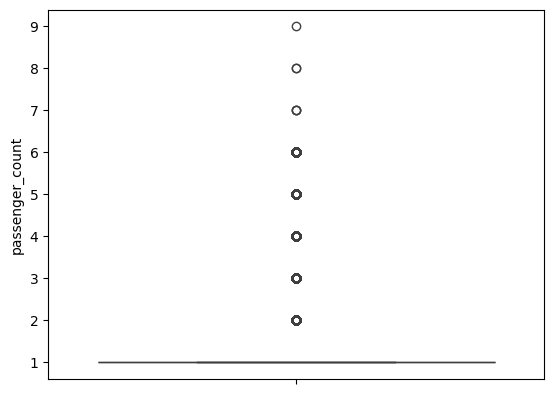

In [374]:
sns.boxplot(df['passenger_count'])

Berdasarkan website https://www.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page

Jumlah penumpang maksimum yang diizinkan dalam taksi kuning menurut undang-undang adalah empat (4) orang dalam taksi empat (4) penumpang atau lima (5) orang dalam taksi lima (5) penumpang. Semua penumpang harus mengenakan sabuk pengaman dan anak-anak berusia di bawah 4 tahun harus duduk di kursi pengaman anak. Anak-anak berusia di bawah 8 tahun harus duduk di sistem pengaman anak, seperti sabuk pengaman, rompi, atau kursi pendorong yang disetujui pemerintah federal.

In [375]:
df['passenger_count'] = df['passenger_count'].apply(lambda x: '>5' if x>5 else str(x))
df['passenger_count'].value_counts()

passenger_count
1.0    58332
2.0     5048
5.0     1763
>5      1056
3.0      943
4.0      360
Name: count, dtype: int64

---

#### Jarak : Trip Distance

<Axes: ylabel='trip_distance'>

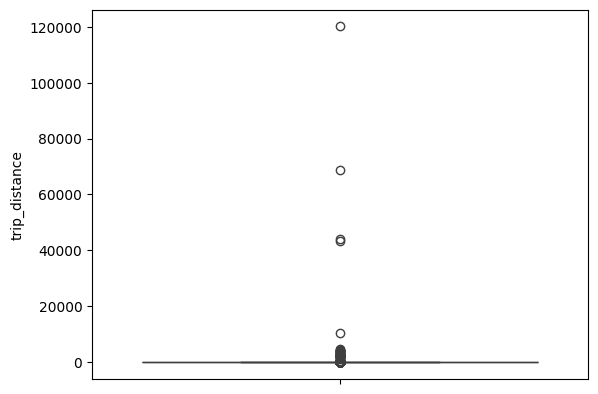

In [376]:
sns.boxplot(df['trip_distance'])

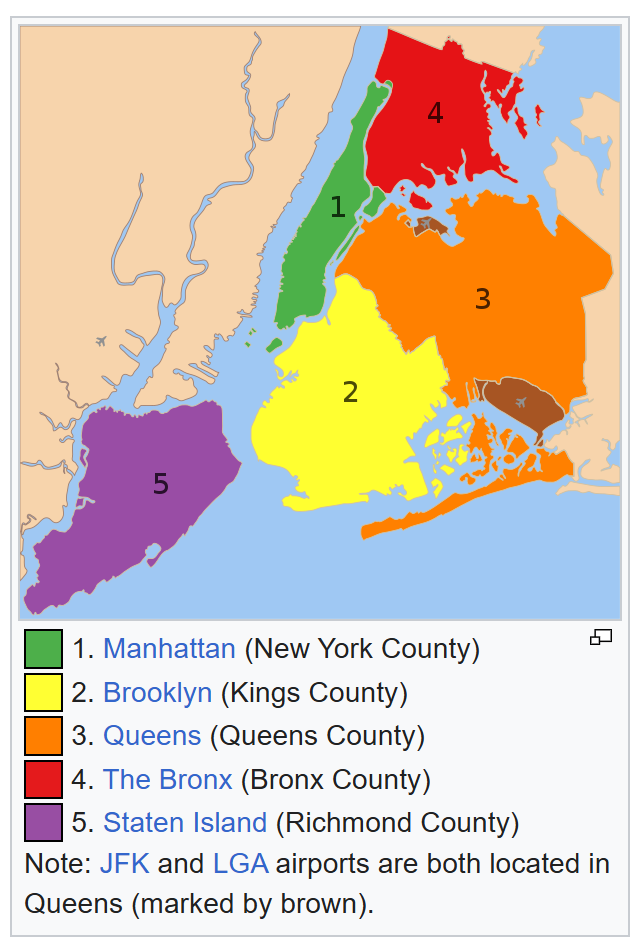

In [377]:
df.groupby(['PUBorough', 'DOBorough']).agg(min=('trip_distance', 'min'),max=('trip_distance', 'max'),mean=('trip_distance', 'mean'),median=('trip_distance', 'median'))

min        max        mean  median
PUBorough     DOBorough                                          
Bronx         Bronx           0.00    3321.43    8.628651   1.455
              Brooklyn        0.00      27.70    6.004500   0.000
              Manhattan       0.00  120098.84  377.222744   2.730
              Queens          0.00      23.03    6.981591   6.080
Brooklyn      Bronx           0.00      20.60    5.112381   0.000
              Brooklyn        0.00   44003.31   13.118698   1.750
              EWR             0.00      15.75   13.111111  14.810
              Manhattan       0.00    2446.53    8.943033   5.400
              Queens          0.00    3965.74   19.552328   8.630
              Staten Island   0.00      14.20    7.100000   7.100
Manhattan     Bronx           0.00    3508.51    6.331995   3.210
              Brooklyn        0.00      30.20   10.942052  11.290
              EWR             0.00      37.97   21.631429  26.035
              Manhattan       0.00   68796.82    5.510701   1.700
              Queens          0.00      33.80    9.170185   7.450
              Staten Island   0.00      24.14   12.070000  12.070
Queens        Bronx           0.00      22.96    8.093958   8.890
              Brooklyn        0.00      22.43    7.292105   6.265
              EWR            17.36      41.74   32.331429  36.620
              Manhattan       0.00    2555.47   10.384362   5.435
              Queens          0.00   10480.36    3.985334   1.750
              Staten Island   0.00       0.00    0.000000   0.000
Staten Island Brooklyn        0.00      11.39    5.695000   5.695
              Queens          0.00       0.00    0.000000   0.000
              Staten Island   0.00       5.52    2.375556   1.400

insight :
- banyak nilai 0 yang merupakan outlier, seharusnya ada jarak perjalanan yang harus ditempuh minimal 0.1 mili maka 0 merupakan record yang seharusnya tidak terjadi, akan di drop
- akan diambil jarak yang masuk akal yaitu nilai <50 yang didapat jarak terjauh antara queens dan ewr, sehingga jika nilai >50 merupakan outlier

In [378]:
print('total data 0 :', len(df[df['trip_distance']==0]))

total data 0 : 2992


In [379]:
# menghapus data 0
df = df[df['trip_distance']>0]

In [380]:
print('data outlier:',len(df[df['trip_distance']>50]))

data outlier: 38


mengganti nilai outlier manjadi nilai median/rata-rata dari setiap wilayah outlier tersebut dengan menggabungkan dua data

In [381]:
outlier=df.loc[df['trip_distance']>50,['PUBorough', 'DOBorough', 'trip_distance']]
outlier

,PUBorough,DOBorough,trip_distance
7322,Queens,Queens,66.18
33373,Queens,Manhattan,1571.97
63995,Brooklyn,Manhattan,579.63
64446,Queens,Manhattan,2555.47
64558,Brooklyn,Brooklyn,3077.89
64572,Queens,Queens,2606.52
64609,Manhattan,Manhattan,43392.12
64695,Queens,Queens,137.95
64947,Brooklyn,Manhattan,2446.53
64954,Bronx,Bronx,2027.31


In [382]:
id_distance_for_outlier = df[df['trip_distance']<50].groupby(['PUBorough', 'DOBorough']).agg(mean=('trip_distance', 'mean'),
                                                                                            median=('trip_distance', 'median')).reset_index()
id_distance_for_outlier

,PUBorough,DOBorough,mean,median
0,Bronx,Bronx,2.728084,2.210
1,Bronx,Brooklyn,20.015000,18.175
2,Bronx,Manhattan,4.929331,3.390
3,Bronx,Queens,12.287600,10.360
4,Brooklyn,Bronx,14.314667,13.830
5,Brooklyn,Brooklyn,2.480122,1.900
6,Brooklyn,EWR,14.750000,14.945
7,Brooklyn,Manhattan,5.964590,5.635
8,Brooklyn,Queens,9.319205,9.505
9,Brooklyn,Staten Island,14.200000,14.200


In [383]:
new_distance_for_outlier = pd.merge(outlier, id_distance_for_outlier, on=['PUBorough', 'DOBorough'], how='left')
new_distance_for_outlier

,PUBorough,DOBorough,trip_distance,mean,median
0,Queens,Queens,66.18,2.528579,1.860
1,Queens,Manhattan,1571.97,6.599735,5.740
2,Brooklyn,Manhattan,579.63,5.964590,5.635
3,Queens,Manhattan,2555.47,6.599735,5.740
4,Brooklyn,Brooklyn,3077.89,2.480122,1.900
5,Queens,Queens,2606.52,2.528579,1.860
6,Manhattan,Manhattan,43392.12,2.198307,1.720
7,Queens,Queens,137.95,2.528579,1.860
8,Brooklyn,Manhattan,2446.53,5.964590,5.635
9,Bronx,Bronx,2027.31,2.728084,2.210


karena hampir semua elemen bernilai mean!=median atau persebarannya tidak mendekati distribusi normal, maka median yang akan digunakan

In [384]:
new_distance_for_outlier.index = outlier.index

print('Hasil Inputasi:')
df.loc[outlier.index, 'trip_distance'] = new_distance_for_outlier['median']
df.loc[outlier.index][['PULocationID', 'DOLocationID', 'trip_distance']]

Hasil Inputasi:


,PULocationID,DOLocationID,trip_distance
7322,134,134,1.860
33373,82,236,5.740
63995,181,137,5.635
64446,193,140,5.740
64558,49,65,1.900
64572,193,193,1.860
64609,41,74,1.720
64695,82,130,1.860
64947,52,79,5.635
64954,119,20,2.210


<Axes: ylabel='trip_distance'>

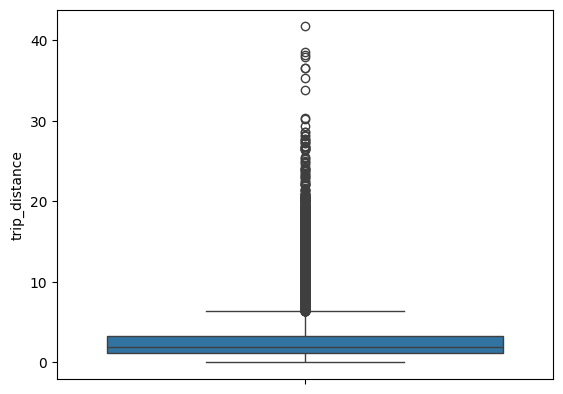

In [385]:
#cek
sns.boxplot(df['trip_distance'])

---

#### Pembayaran (Amount) : fare_amount, tip_amount, total_amount

In [386]:
df[['fare_amount','tip_amount','total_amount']].describe()

,fare_amount,tip_amount,total_amount
count,64510.000000,64510.000000,64510.000000
mean,16.256456,2.189876,21.538543
std,11.785826,2.976836,13.975395
min,-70.000000,0.000000,-71.500000
25%,9.300000,0.000000,12.950000
50%,12.800000,1.800000,17.810000
75%,19.100000,3.410000,25.980000
max,455.000000,222.220000,456.000000


##### mengatasi nilai < 0 (nilai negatif)

mengatasi nilai < 0 (nilai negatif) dengan mengubah nilai menjadi positif pada features `fare_amount`

In [387]:
df.loc[(df['fare_amount']<0), 'fare_amount'].unique()

array([ -3.  ,  -8.6 ,  -4.5 ,  -3.7 ,  -4.4 , -10.  ,  -7.2 ,  -6.5 ,
        -4.  ,  -5.8 ,  -9.3 , -13.  ,  -5.1 , -70.  ,  -7.9 , -20.  ,
       -15.  , -14.2 , -27.96, -43.54, -17.38, -35.01, -15.53])

In [388]:
negatif_value  = df[df['fare_amount']<0]
df.loc[negatif_value.index, 'fare_amount'] = df['fare_amount'].abs()

In [389]:
df.loc[(df['fare_amount']<0), 'fare_amount'].unique()

array([], dtype=float64)

mengatasi nilai < 0 (nilai negatif) dengan mengubah nilai menjadi positif pada features `total_amount`

In [390]:
df.loc[(df['total_amount']<0), 'total_amount'].unique()

array([ -4.5 , -11.1 ,  -5.3 ,  -5.2 ,  -5.9 , -11.5 ,  -8.4 ,  -7.  ,
       -11.2 ,  -8.  ,  -4.8 ,  -7.3 , -13.3 , -10.5 , -14.  ,  -7.6 ,
       -71.5 , -10.1 ,  -9.4 ,  -7.7 ,  -6.9 , -12.5 , -21.  ,  -6.2 ,
        -9.8 ,  -8.3 , -10.4 ,  -1.5 , -14.65,  -8.65,  -4.25,  -5.5 ,
        -9.  , -15.3 ,  -6.6 ,  -8.7 , -18.2 , -23.96, -41.78, -16.12,
       -29.15, -14.31])

In [391]:
negatif_value  = df[df['total_amount']<0]
df.loc[negatif_value.index, 'total_amount'] = df['total_amount'].abs()

In [392]:
df.loc[(df['total_amount']<0), 'total_amount'].unique()

array([], dtype=float64)

##### mengatasi nilai = 0 (nilai null)

mengatasi nilai = 0 (nilai null) untuk kolom `fare_amount`

In [393]:
df.loc[(df['fare_amount']==0), ['trip_distance','fare_amount','total_amount','PUBorough','DOBorough']]

,trip_distance,fare_amount,total_amount,PUBorough,DOBorough
21813,2.10,0.0,0.00,Queens,Queens
24094,0.10,0.0,12.00,Queens,Queens
30192,3.00,0.0,12.00,Queens,Queens
30232,2.34,0.0,1.50,Bronx,Bronx
30233,2.34,0.0,1.50,Bronx,Bronx
30247,0.17,0.0,1.50,Bronx,Bronx
30248,0.17,0.0,1.50,Bronx,Bronx
36900,24.14,0.0,4.25,Manhattan,Staten Island
36901,24.14,0.0,4.25,Manhattan,Staten Island
44826,3.30,0.0,0.00,Queens,Queens


nilai akan dihapus

In [394]:
df = df[df['fare_amount']>0]

In [395]:
df.loc[(df['fare_amount']==0)]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone


mengatasi nilai = 0 (nilai null) untuk kolom `tip_amount` tidak usah dilakukan karena mungkin orang itu tidak memberikan tip atau pembayaran pake cash

mengatasi nilai = 0 (nilai null) untuk kolom `total_amount`

In [396]:
df.loc[(df['total_amount']==0)]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone


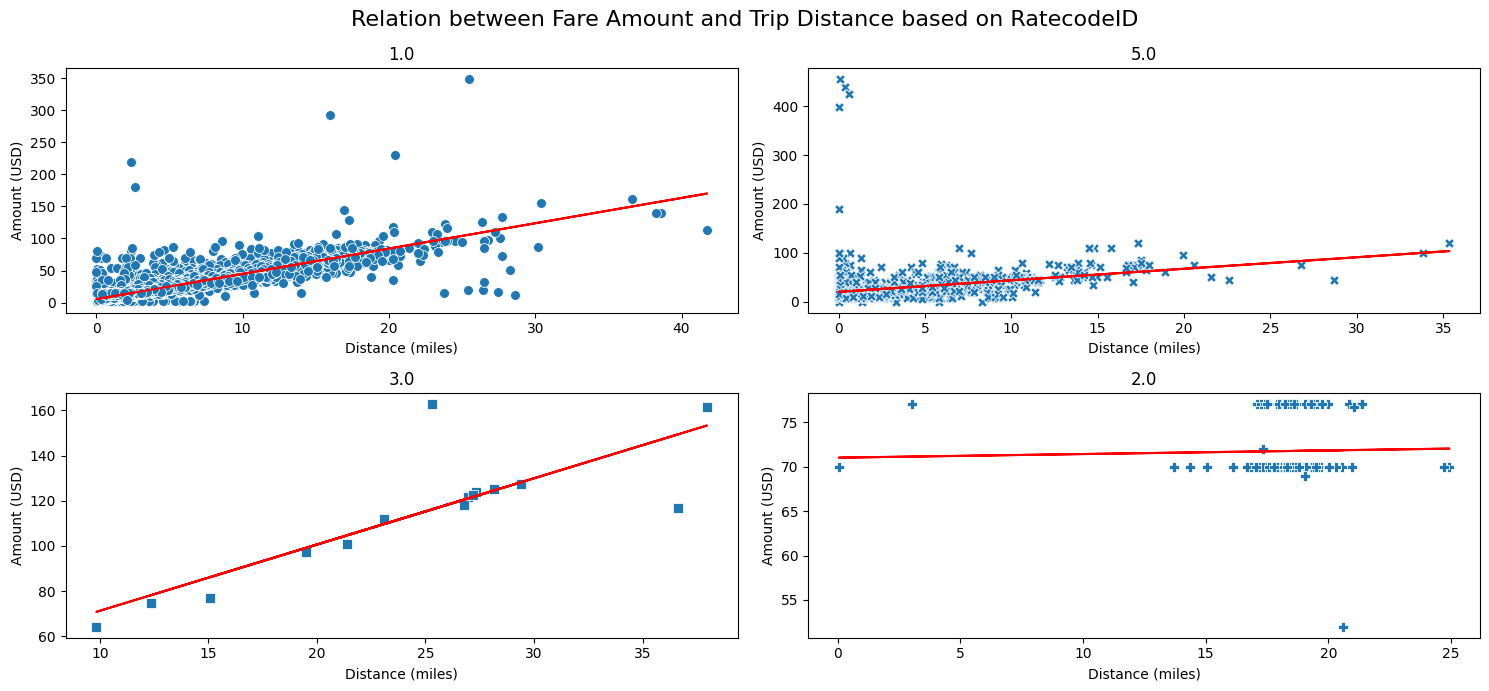

In [397]:
plt.figure(figsize=(15, 7))
plt.suptitle('Relation between Fare Amount and Trip Distance based on RatecodeID', fontsize=16)
markers=['o','X','s','P']
for i, val in enumerate(df['RatecodeID'].unique()):
    subset = df[df['RatecodeID'] == val]
    x = subset['trip_distance']
    y = subset['fare_amount']

    plt.subplot(2,2,i+1)
    sns.scatterplot(x=x, y=y, marker=markers[i], s=50)
    plt.title(val)
    plt.xlabel('Distance (miles)')
    plt.ylabel('Amount (USD)')
    if val == 'JFK Airport':
        plt.axhline(y=70, color='red') 
        continue
    else:
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x + b, color='red')
    
plt.tight_layout()
plt.show()

RatecodeID=1

In [398]:
outlier= df.loc[(df["RatecodeID"]==1) & (df["fare_amount"]>140), ['trip_distance',"fare_amount",'PUBorough','DOBorough']]
outlier

,trip_distance,fare_amount,PUBorough,DOBorough
556,16.00,292.80,Queens,Queens
2014,2.35,218.60,Queens,Queens
5906,30.40,154.90,Brooklyn,Manhattan
7731,25.48,348.10,Queens,Queens
9536,36.61,161.20,Brooklyn,Brooklyn
12615,20.43,230.50,Queens,Queens
37830,38.60,140.20,Queens,EWR
40942,38.24,140.20,Queens,EWR
62569,16.94,145.10,Manhattan,Manhattan
65683,2.64,181.07,Brooklyn,Brooklyn


In [399]:
id1_fare_amount_for_outlier = df[(df["RatecodeID"]==1) &(df['fare_amount']<140)].groupby(['PUBorough', 'DOBorough']).agg(mean=('fare_amount', 'mean'),
                                                                                            median=('fare_amount', 'median')).reset_index()
id1_fare_amount_for_outlier

,PUBorough,DOBorough,mean,median
0,Bronx,Bronx,17.029867,15.600
1,Bronx,Brooklyn,62.821667,61.865
2,Bronx,Manhattan,24.365000,20.500
3,Bronx,Queens,46.685238,40.920
4,Brooklyn,Bronx,54.944667,58.300
5,Brooklyn,Brooklyn,16.213635,14.000
6,Brooklyn,EWR,62.850000,62.850
7,Brooklyn,Manhattan,29.355564,28.200
8,Brooklyn,Queens,39.457944,37.800
9,Brooklyn,Staten Island,42.500000,42.500


In [400]:
new1_fare_amount_for_outlier = pd.merge(outlier, id1_fare_amount_for_outlier, on=['PUBorough', 'DOBorough'], how='left')
new1_fare_amount_for_outlier

,trip_distance,fare_amount,PUBorough,DOBorough,mean,median
0,16.00,292.80,Queens,Queens,15.143887,12.8
1,2.35,218.60,Queens,Queens,15.143887,12.8
2,30.40,154.90,Brooklyn,Manhattan,29.355564,28.2
3,25.48,348.10,Queens,Queens,15.143887,12.8
4,36.61,161.20,Brooklyn,Brooklyn,16.213635,14.0
5,20.43,230.50,Queens,Queens,15.143887,12.8
6,38.60,140.20,Queens,EWR,94.200000,94.2
7,38.24,140.20,Queens,EWR,94.200000,94.2
8,16.94,145.10,Manhattan,Manhattan,13.721716,12.1
9,2.64,181.07,Brooklyn,Brooklyn,16.213635,14.0


In [401]:
new1_fare_amount_for_outlier.index = outlier.index

print('Hasil Inputasi:')
df.loc[outlier.index, 'fare_amount'] = new1_fare_amount_for_outlier['median']
df.loc[outlier.index][['PULocationID', 'DOLocationID', 'fare_amount']]

Hasil Inputasi:


,PULocationID,DOLocationID,fare_amount
556,223,8,12.8
2014,223,223,12.8
5906,97,107,28.2
7731,223,223,12.8
9536,65,25,14.0
12615,223,223,12.8
37830,130,1,94.2
40942,219,1,94.2
62569,166,166,12.1
65683,36,255,14.0


<Axes: xlabel='trip_distance', ylabel='fare_amount'>

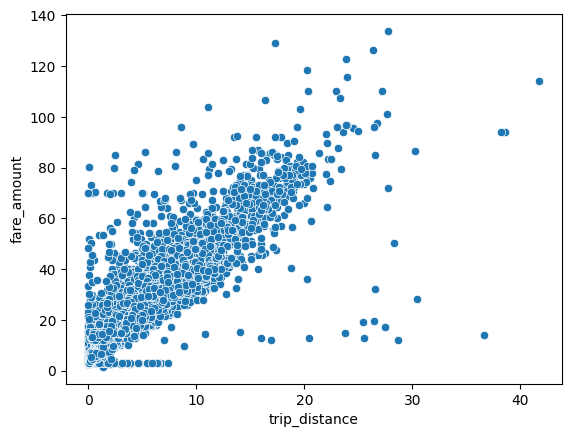

In [402]:
sns.scatterplot(x=df[df['RatecodeID'] == 1]['trip_distance'], y = df[df['RatecodeID'] == 1]['fare_amount'])

RatecodeID = 2

In [403]:
outlier= df.loc[(df["RatecodeID"]==2) & (df["fare_amount"]<70), ['trip_distance',"fare_amount",'PUBorough','DOBorough']]
outlier

,trip_distance,fare_amount,PUBorough,DOBorough
28681,20.60,52.00,Manhattan,Queens
65684,19.07,68.98,Manhattan,Queens


In [404]:
print('Hasil Inputasi:')
df.loc[outlier.index, 'fare_amount'] = [70,70]
df.loc[outlier.index][['PULocationID', 'DOLocationID', 'fare_amount']]

Hasil Inputasi:


,PULocationID,DOLocationID,fare_amount
28681,120,132,70.0
65684,116,132,70.0


<Axes: xlabel='trip_distance', ylabel='fare_amount'>

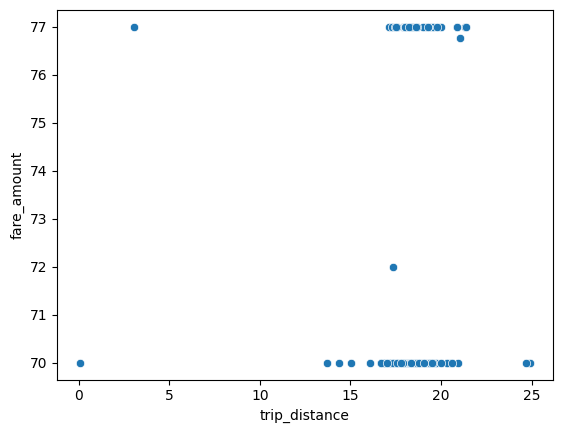

In [405]:
sns.scatterplot(x=df[df['RatecodeID'] == 2]['trip_distance'], y = df[df['RatecodeID'] == 2]['fare_amount'])

In [409]:
outlier= df.loc[((df["RatecodeID"]==3) & (df["fare_amount"]>150) & (df["trip_distance"]<30))|
                ((df["RatecodeID"]==3) & (df["fare_amount"]<120) & (df["trip_distance"]>35))
                 , ['trip_distance',"fare_amount",'PUBorough','DOBorough']]
outlier

,trip_distance,fare_amount,PUBorough,DOBorough
46141,25.31,162.6,Manhattan,EWR
64952,36.62,116.7,Queens,EWR


In [410]:
id3_fare_amount_for_outlier = df[(df["RatecodeID"]==3)].groupby(['PUBorough', 'DOBorough']).agg(mean=('fare_amount', 'mean'),
                                                                                            median=('fare_amount', 'median')).reset_index()
id3_fare_amount_for_outlier

,PUBorough,DOBorough,mean,median
0,Brooklyn,EWR,75.850000,75.85
1,Manhattan,EWR,119.741667,122.05
2,Queens,EWR,116.700000,116.70


In [411]:
new3_fare_amount_for_outlier = pd.merge(outlier, id3_fare_amount_for_outlier, on=['PUBorough', 'DOBorough'], how='left')
new3_fare_amount_for_outlier

,trip_distance,fare_amount,PUBorough,DOBorough,mean,median
0,25.31,162.6,Manhattan,EWR,119.741667,122.05
1,36.62,116.7,Queens,EWR,116.700000,116.70


In [412]:
new3_fare_amount_for_outlier.index = outlier.index

print('Hasil Inputasi:')
df.loc[outlier.index, 'fare_amount'] = new3_fare_amount_for_outlier['median']
df.loc[outlier.index][['PULocationID', 'DOLocationID', 'fare_amount']]

Hasil Inputasi:


,PULocationID,DOLocationID,fare_amount
46141,43,1,122.05
64952,95,1,116.70


<Axes: xlabel='trip_distance', ylabel='fare_amount'>

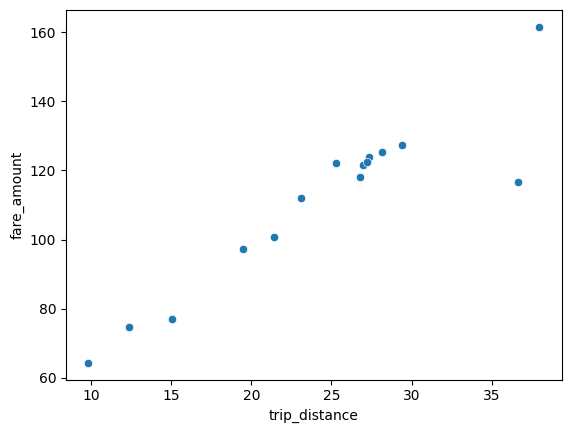

In [413]:
sns.scatterplot(x=df[df['RatecodeID'] == 3]['trip_distance'], y = df[df['RatecodeID'] == 3]['fare_amount'])

### **3.2 Duplicated Values**

In [420]:
df.duplicated().sum()

np.int64(99)

In [419]:
df[df.duplicated()]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,payment_type,trip_type,PUBorough,PUZone,DOBorough,DOZone
663,2023-01-01 14:58:13,2023-01-01 14:58:39,1.0,75,74,2.0,0.17,3.0,0.0,4.5,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem North
1318,2023-01-02 02:05:08,2023-01-02 02:12:57,1.0,129,82,1.0,0.64,8.6,0.0,11.1,3.0,1.0,Queens,Jackson Heights,Queens,Elmhurst
1687,2023-01-02 12:56:53,2023-01-02 13:00:10,1.0,75,75,1.0,0.77,4.5,0.0,5.3,4.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South
1865,2023-01-02 13:51:33,2023-01-02 13:52:42,1.0,75,75,2.0,0.08,3.7,0.0,5.2,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South
2482,2023-01-02 19:03:48,2023-01-02 19:04:24,1.0,130,130,1.0,0.11,3.0,0.0,4.5,3.0,1.0,Queens,Jamaica,Queens,Jamaica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60963,2023-01-30 15:57:52,2023-01-30 16:00:00,1.0,41,41,1.0,0.37,4.4,0.0,8.4,4.0,1.0,Manhattan,Central Harlem,Manhattan,Central Harlem
61103,2023-01-30 17:17:09,2023-01-30 17:33:27,1.0,260,82,1.0,0.67,14.2,0.0,18.2,3.0,1.0,Queens,Woodside,Queens,Elmhurst
63359,2023-01-31 18:39:16,2023-01-31 18:39:29,1.0,130,130,3.0,0.05,3.0,0.0,7.0,4.0,1.0,Queens,Jamaica,Queens,Jamaica
63545,2023-01-31 19:06:18,2023-01-31 19:06:46,1.0,75,75,2.0,0.08,3.0,0.0,7.0,3.0,1.0,Manhattan,East Harlem South,Manhattan,East Harlem South


In [422]:
df.drop_duplicates(inplace= True)
df.duplicated().sum()

np.int64(0)

## **Section 4. Analytics**

### **4.1 Question 1**

### **4.2 Question 2**

## **Section 5. Conclusion and Recommendation**

**5.1 Conclusion**

**5.2 Recommendation**